In [19]:
import numpy as np
from numpy import pi, sin, cos
import matplotlib.pyplot as plt
from scipy.fftpack import *
%matplotlib inline

## Theorem 1 (Decay of Fourier coefficients):



i) If $u\in C^{p-1}(\mathbb{R})$ and $u^{(p)}\in\mathcal{BV}(\mathbb{R})$, then the Fourier coefficients of $u$ decay like $\mathcal{O}(|k|^{-p-1})$ as $|k|\to\infty$

ii) If $u\in C^{\infty}(\mathbb{R})$ and $u^{(m)}\in\mathcal{BV}(\mathbb{R})$ for all $m\geq0$, then the Fourier transform of $u$ decay like $\mathcal{O}(|k|^{-m})$ for all $m\geq0$

iii) There exist $a,c>0$ such that $u$ is analytic on the complex strip $\Im|z|<a$ with $\lVert u(z)\rVert_{L_2(\Im z=y)}\leq c$ for all $y\in(-a,a)$ if and only if $e^{a|k|}|\hat{u}(k)|\in L_2(\mathbb{R})$

iv) The function $u$ can be analytically extended to all of $\mathbb{C}$ and there exists a $a>0$ such that $|u(z)|=o(e^{a|z|})$ as $|z|\to\infty$ if and only if $\hat{u}$ has compact support on $[-a,a]$

## Proof Outline of 1.i)



First prove the result for p=1. This is done by integrating by parts for each Fourier coefficient. 
Second, apply this fact of the first derivative multiple times to get the proposed coefficients for $u^{(p)}$. Since $u^{(p)}\in\mathcal{BV}(\mathbb{R})$ then the derivative coefficients will decay to zero and we have the result.

Proof Outline of 1.ii)
Follows straight from i).

For proof of 1.iii) and 1.iv) please see Paley-Wiener theorems

## Theorem 2 (Alliasing):



Let $u$ have a derivative of bounded variation and let $v$ be the function defined on $h\mathbb{Z}$ by $v_j=u(x_j)$. Then for all $k\in[-\pi/h,\pi/h]$,

$$\hat{v} = \sum_{j=-\infty}^{\infty}\hat{u}(k+2\pi j/h)$$

which also leads to 

$$\hat{v}(k)-\hat{u}(k) = \sum_{j=-\infty, j\neq0}^{\infty}\hat{u}(k+2\pi j/h)$$



## Theorem 3 (Discretization Accuracy):


Assuming the premise of Theorem 2, we have the following results.

i) Under the assumptions of 1.i), then 
$$|\hat{v}(k)-\hat{u}(k)| = \mathcal{O}(h^{p+1})$$ as $h\to0$

ii) Under the assumptions of 1.ii), then
$$|\hat{v}(k)-\hat{u}(k)| = \mathcal{O}(h^m)$$ as $h\to0$ for all $m\geq0$

iii) Under the assumptions of 1.iii), then 
$$|\hat{v}(k)-\hat{u}(k)| = \mathcal{O}(e^{-\pi(a-\epsilon)/h})$$ as $h\to0$ for all $\epsilon>0$

iv) Under the assumptions of 1.iv) and assuming $h\leq\pi/a$, then 
$$\hat{v}(k)=\hat{u}(k)$$



## Outline of proof of Theorem 3 (all parts):



Consider the error term as dominated by the largest Fourier coefficent. Then as $h\to0$, we have $|k+2\pi \pm1/h|\to\infty$

## Theorem 4 (Spectral differentiation):



Suppose $u$ has a $p$th derivative of bounded variation. Let $v^{(p)}$ be the $p$th spectral derivative for $u$ on the uniform mesh of discrete size $h$,

i) If $u$ has $n-1$ continuous derivatives in $L_2(\mathbb{R})$ and an $n$th derivative of bounded variation for some $n\geq p+1$ then
$$|v^{(p)}(x_j)-u^{(p)}(x_j)|=\mathcal{O}(h^{n-p})$$
as $h\to0$

ii) Under the assumptions of 1.ii) then
$$|v^{(p)}(x_j)-u^{(p)}(x_j)|=\mathcal{O}(h^{m})$$ for all $m\geq0$ as $h\to0$

iii)Under the assumptions of 1.iii) then
$$|v^{(p)}(x_j)-u^{(p)}(x_j)|=\mathcal{O}(e^{-\pi(a-\epsilon)/h})$$ for all as $h\to0$

iv)Under the assumptions of 3.iv) then
$$v^{(p)}(x_j)=u^{(p)}(x_j)$$

## Code

In [3]:
def fft_deriv1(func,grid_pts):
    n = grid_pts
    tvals = np.linspace(0,(n-1)/n,n)
    fftvals =  fft(func(tvals)) #discrete fourier transform
    dfft = 1j*fftfreq(n,1/(2*np.pi*n))*fftvals #derivative
    return np.real(ifft(dfft))

def spectralDiff_Test(f,df):
    error = np.zeros(97)
    for n in np.arange(8,202,2):
        xvals = np.linspace(0,(n-1)/n,n)
        spec_deriv = fft_deriv1(f,n) #compute spectral derivative
        true_deriv = df(xvals) #compute true derivative
        error[int(n/2)-4] = np.max(true_deriv-spec_deriv)
        
    #plotting the error
    plt.figure()
    plt.loglog(np.arange(8,202,2),error,linewidth=2)
    plt.ylabel("Error")
    plt.xlabel("Discretization Points")
    plt.grid()
    plt.show()

## A typical example

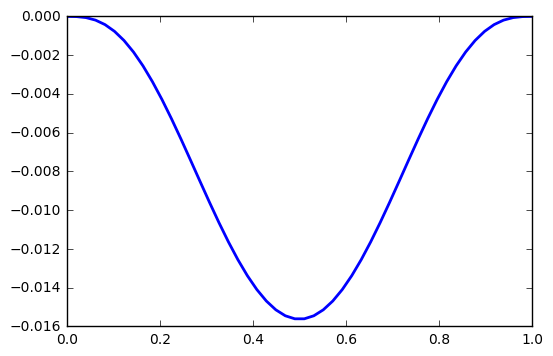

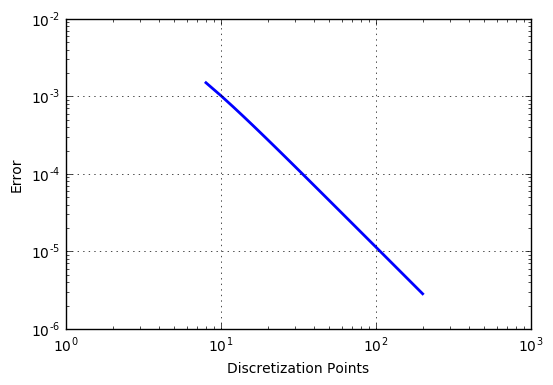

In [4]:
def f(x):
    return (x*(x-1))**3
def df(x):
    return 3*(x*(x-1))**2*(2*x-1)
x = np.linspace(0,1)
plt.plot(x,f(x),linewidth=2)
spectralDiff_Test(f,df)

## Example of Paley Wiener theorem in action

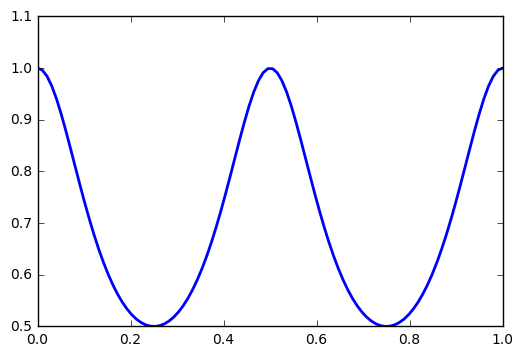

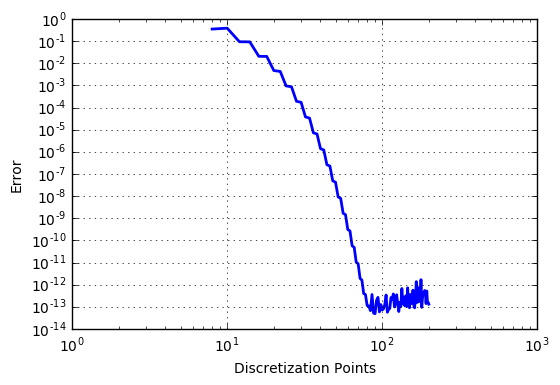

In [5]:
def f(x):
    return 1/(sin(2*pi*x)**2+1)
def df(x):
    return -4*pi*sin(2*pi*x)*cos(2*pi*x)/(sin(2*pi*x)**2+1)**2
x = np.linspace(0,1,100)
plt.plot(x,f(x),linewidth=2)
spectralDiff_Test(f,df)

The function $$\frac{1}{\sin^2(2\pi z)+1}$$
has singularities at 
$$n-\frac{i\ln(\sqrt{2}-1)}{2\pi}, n+\frac{1}{2} -\frac{i\ln(\sqrt{2}+1)}{2\pi}$$

## Example 2 of Paley-Wiener theorems

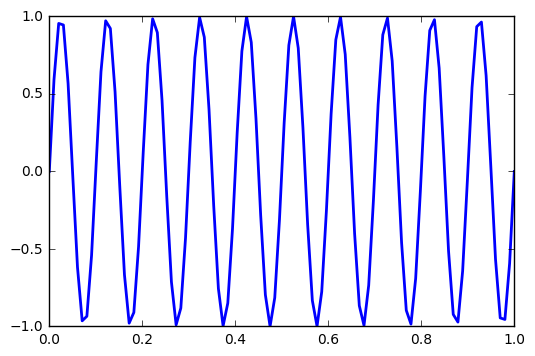

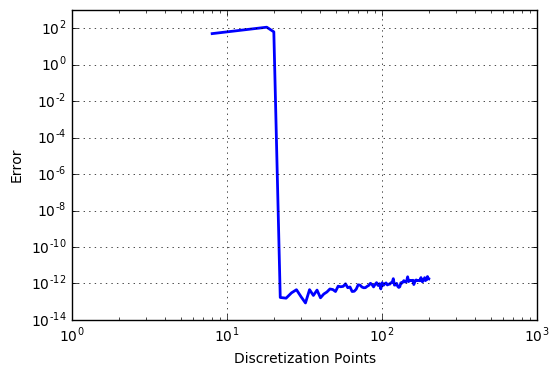

In [20]:
def f(x):
    return sin(20*pi*x)
def df(x):
    return 20*pi*cos(20*pi*x)
x = np.linspace(0,1,100)
plt.plot(x,f(x),linewidth=2)
spectralDiff_Test(f,df)

## Spectral differentiation is not the end all be all

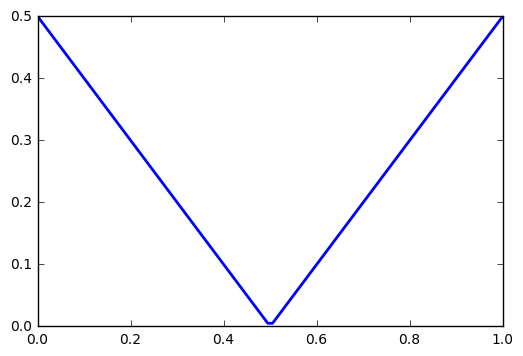

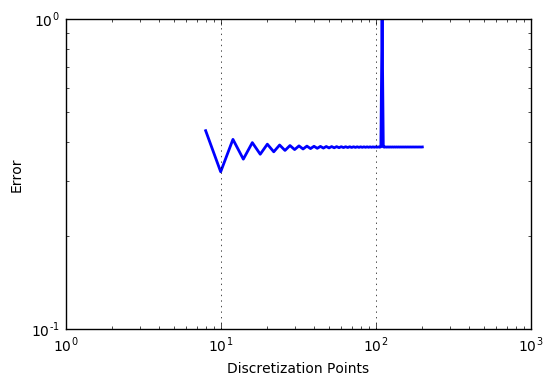

In [21]:
def f(x):
    return np.abs(x-.5)
def df(x):
    return np.sign(x-.5)
x = np.linspace(0,1,100)
plt.plot(x,f(x),linewidth=2)
spectralDiff_Test(f,df)

## References

Lloyd Trefethen, Spectral Methods in MATLAB

Georgi Tolstov, Fourier Series

